# Lab 1 

Katie Ayala & John Lucero <br>
PHYS 134L <br>
April 12, 2019

In [77]:
import os
import numpy as np
import scipy.misc
from astropy.io import fits
from scipy import ndimage
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

### Read in the FITS file and plot

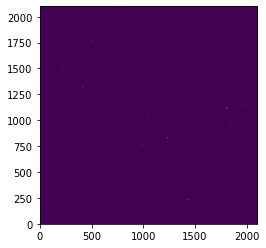

In [78]:
# For use in lab
# imagefile = os.path.join(os.sep, 'Z:', 'ayala_lucero', 'object.fits')
# imagefile = os.path.join(os.sep, 'C:/', 'Users\lucer\Projects\Lab_env\Lab_1', 'object.fits')
imagefile = os.path.join(os.sep, 'C:/', '/Users/katie/Documents/School/PHYS_134L/Lab1', 'object.fits')
image = fits.open(imagefile)[0].data

plt.imshow(image, origin='lower')
plt.show()

### Adjust the image

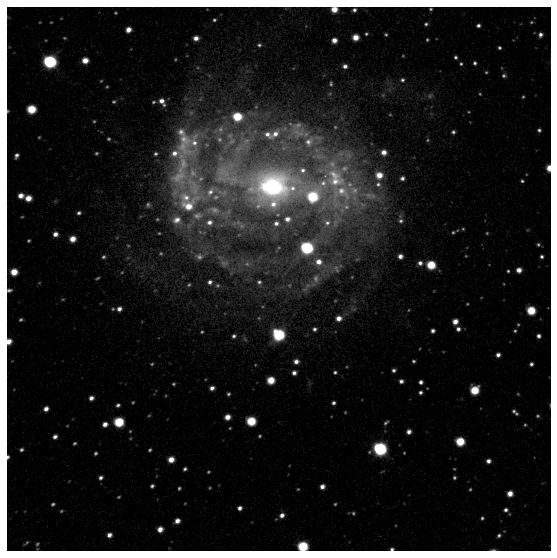

Min: 0.004003866
Max: 223.834
Mean: 6.099072
Stdev: 3.1061122


In [82]:
#imagefile = os.path.join(os.sep, 'Z:', 'ayala_lucero', 'object.fits')
# imagefile = os.path.join(os.sep, 'C:/', 'Users\lucer\Projects\Lab_env\Lab_1', 'object.fits')
image = np.sqrt(fits.open(imagefile)[0].data)
plt.figure(figsize =(10,10))
plt.ylim(900, 1700)
plt.xlim(500, 1300)
plt.imshow(image, cmap = 'gray' ,origin='lower',  interpolation='bilinear', vmin = 6, vmax = 18)
plt.axis('off')
plt.show()

print('Min:', np.min(image))
print('Max:', np.max(image))
print('Mean:', np.mean(image))
print('Stdev:', np.std(image))

### Read in a catalog of stars built using SExtractor and plot the extracted stars atop the image 
Stars that have `flag == 0` are plotted in one color/marker style and stars that have `flag != 0` are in a different color/marker style 

20.960804530552455
[71.73436, 11.871413, 73.496864, 21.944862, 7.5976834, 8.908791, 10.9570055, 10.690977, 18.916204, 13.2958555, 15.2038765, 7.9904675, 12.834, 8.008888]


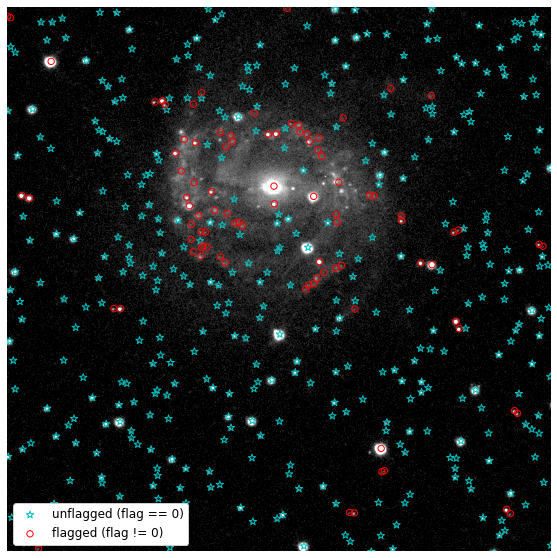

In [104]:
# catalogfile = os.path.join(os.sep, 'Z:', 'ayala_lucero', 'object.cat')
# catalogfile = os.path.join(os.sep, 'C:/', 'Users\lucer\Projects\Lab_env\Lab_1', 'object.cat')
catalogfile = os.path.join(os.sep, 'C:/', '/Users/katie/Documents/School/PHYS_134L/Lab1', 'object.cat')
catalog = np.loadtxt(catalogfile)

x = catalog[:,5]
y = catalog[:,6]
flag = catalog[:,9]
flux = catalog[:,2]
zero_flag = (x, y, np.where(flag == 0))
i=0
pVal = []
while i < 14:
    a = int(catalog[i,5])
    b = int(catalog[i,6])
    pVal.append(np.max(image[b,a]))
    i+=1
avg = np.sum(pVal)/len(pVal)
print(avg)
print(pVal)
x_flagged = []
y_flagged = []
x_noflag = []
y_noflag = []
i = 0
while i < len(catalog):
    if catalog[i,9] == 0:
        x_flagged.append(catalog[i,5])
        y_flagged.append(catalog[i,6])
    else:
        x_noflag.append(catalog[i,5])
        y_noflag.append(catalog[i,6])
    i += 1
    
plt.figure(figsize=(10,10))
plt.ylim(900, 1700)
plt.xlim(500, 1300)
plt.imshow(image, cmap = 'gray' ,origin='lower', vmin = 6, vmax = 18)

#nonzero_flag = (x, y, np.where(flag != 0))

plt.scatter(x_flagged, y_flagged, s=60, edgecolors='c',facecolors='none', marker ="*", 
            label="unflagged (flag == 0)")
plt.scatter(x_noflag, y_noflag , s=40, edgecolors='r',facecolors='none', 
            label="flagged (flag != 0)")

plt.axis('off')
plt.legend(loc='lower left', fontsize=12, framealpha=1)
plt.show()

### Marker representations
The image above has maker overlayed on it. The blues stars are obects from the .cat file that had a "flag" value of zero.
As for the red circle makers, these repesent objects from the .cat file that had a "flag" value. From inspection, we can see that these flagged markers are mostly in pairs or in the galaxy cluster. This lead us to believe these pixels had some kind of issue during analysis, and looking at the SExtractor manual confirmed this. The flagged objects are from "bad or "noisy" pixels. Delving a bit further into it by looking at the flagged values and thier meaning from the SExtractor manual, most of the flagged objects in the cat file were flagged because one of the following or a combination of:

1. The object was originally blended with another one
2. The object is truncated (too close to an image boundary).
3. At least one pixel of the object is saturated (or very close to)